In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

### Correlação

Vamos medir as correlações entre as variáveis

In [2]:
from sklearn.datasets import make_classification, make_regression

In [3]:
# Gerar dataset de regressão
X, y = make_regression(n_samples=100, n_features=5, n_informative=10)

In [4]:
# Colocar dados em um Dataframe Pandas para melhor manipulação
df2 = pd.DataFrame(X)
df2['target'] = y
df2.columns = ['var1', 'var2', 'var3', 'var4', 'var_cat', 'target']

In [5]:
# Criando variável Categórica baseada na variável target - propositalmente, para termos forte correlação
df2['var_cat'] = pd.cut(df2.target,4, labels=[1,2,3,4])
df2['var_cat'] = df2.var_cat.astype(int)

In [6]:
df2.head(3)

,var1,var2,var3,var4,var_cat,target
0,-0.268638,-0.477986,-0.380991,-0.613789,2,-86.333776
1,-0.675760,0.531981,0.941671,-0.941438,3,38.257100
2,2.863996,0.217879,-0.089154,0.524430,4,265.733009


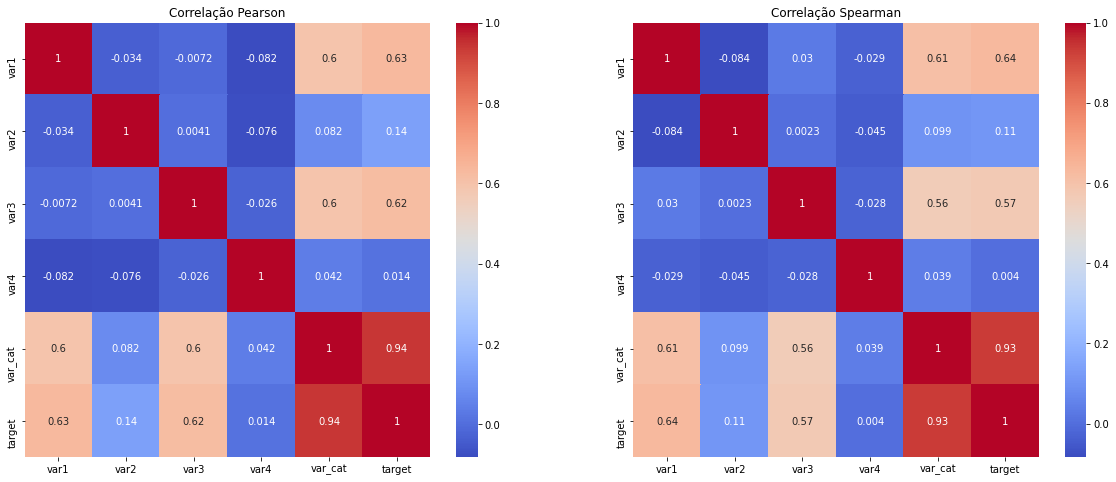

In [7]:
# Correlação Pearson e Spearman
fig, ax = plt.subplots(1,2,figsize=(20,8))
g = sns.heatmap(df2.corr(method='pearson'), cmap='coolwarm', annot=True, ax=ax[0])
g.set_title('Correlação Pearson')
g2 = sns.heatmap(df2.corr(method='spearman'), cmap='coolwarm', annot=True, ax=ax[1])
g2.set_title('Correlação Spearman');

No gráfico acima, podemos ver os cálculos de correlação de Pearson e Spearman. Na prática, para muitos datasets os valores pouco diferem. Entretanto, saber a diferença entre eles e quando usar cada um dos métodos é essencial, a fim de que a sua seleção de atributos seja mais precisa.

No caso do nosso dataset hipotético, temos que a var_cat (variável categórica) é numérica, mas representa categorias ordinais, sendo 1 menos importante do que 5. Essa correlação de *var_cat com target* deve ser medida usando a correlação de Spearman.